## 📚 1. Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

## 📥 2. Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 🔍 3. Exploratory Data Analysis (EDA) & ETL

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Checking for null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
# We're gonna fill the NaN values with 0

df['total_bedrooms'] = df.total_bedrooms.fillna(0)

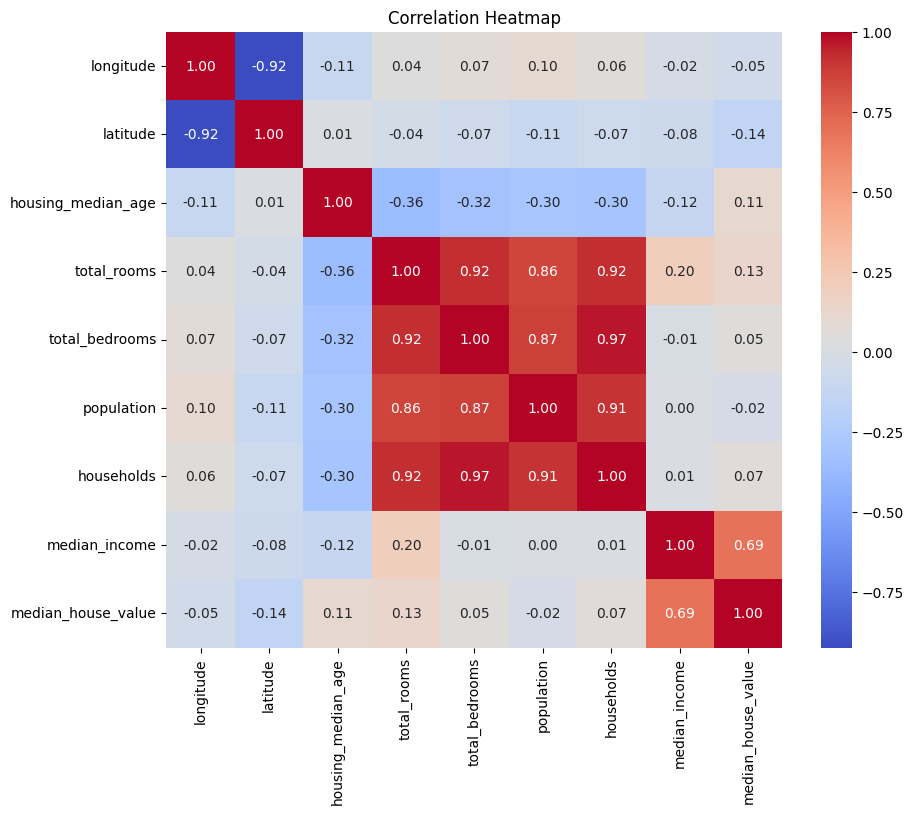

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

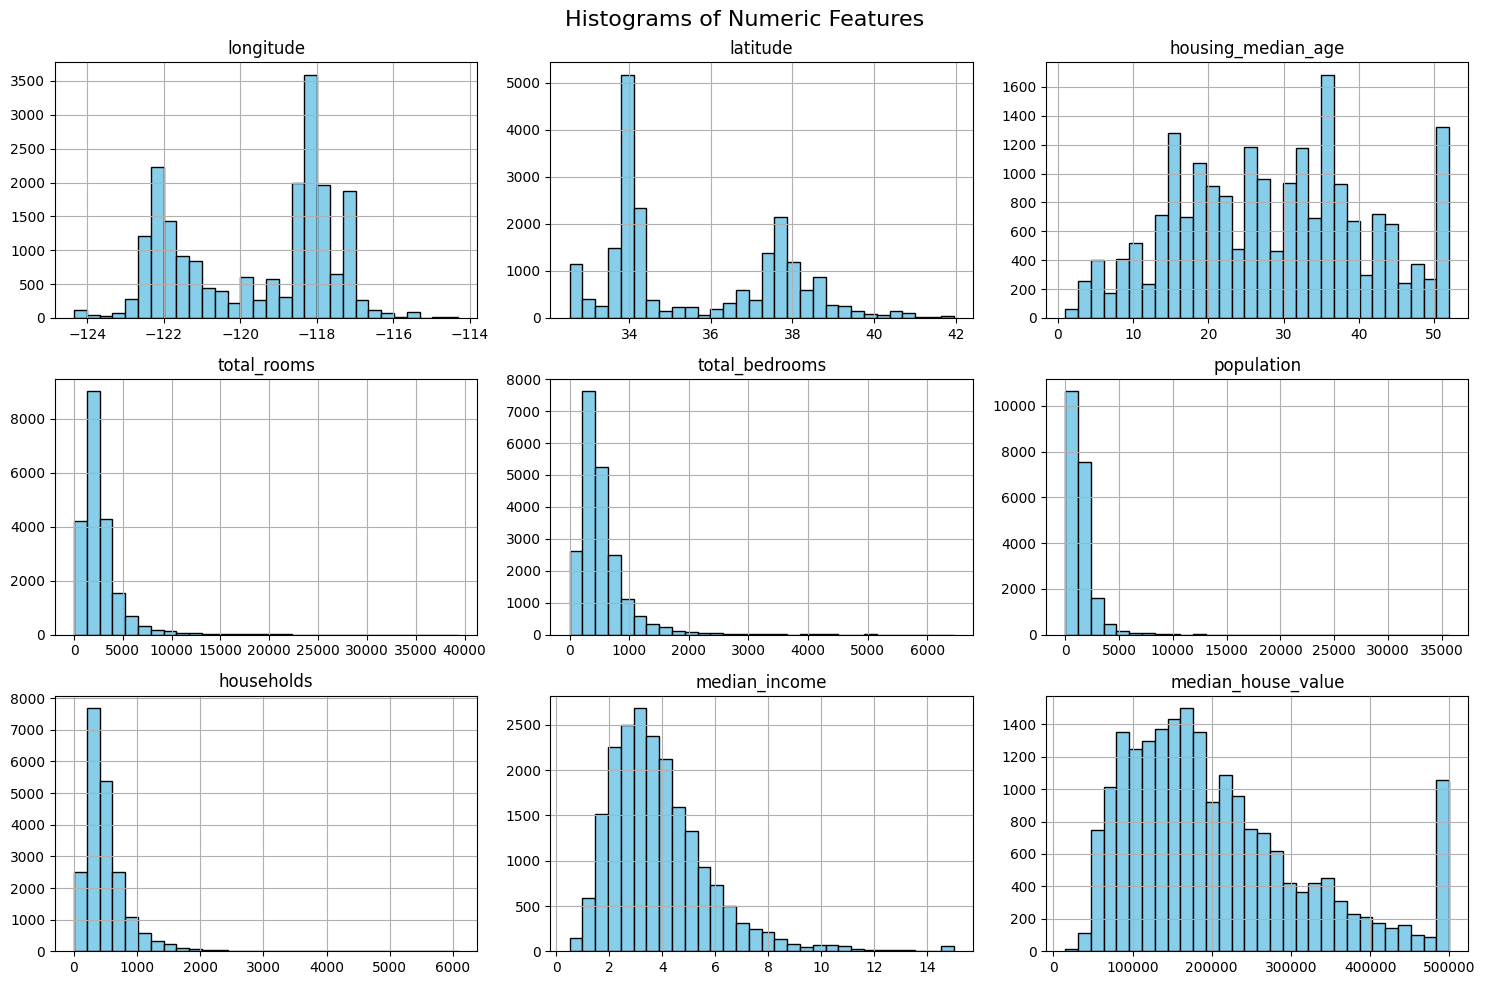

In [22]:
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

## 🎯 4. Feature Selection

To select the best feature for this univariate model, we're gonna use correlation matrix and Rˆ2 score.

We're searching for the bigger correlation a rˆ2 scores

In [13]:
correlation_matrix = df.corr(numeric_only=True)
target_corr = correlation_matrix["median_house_value"].sort_values(ascending=False)
target_corr

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [16]:
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']

for feature in features:
    X = df[[feature]]
    y = df["median_house_value"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print(f"{feature}: R² = {r2:.4f}")


median_income: R² = 0.4589
housing_median_age: R² = 0.0126
total_rooms: R² = 0.0180
total_bedrooms: R² = 0.0027
population: R² = 0.0001
households: R² = 0.0052


In [26]:
X = df[features].dropna()
y = df.loc[X.index, "median_house_value"]

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

print("F-scores for feature selection:")
for feat, score in zip(features, selector.scores_):
    print(f"{feat}: {score:.2f}")

F-scores for feature selection:
median_income: 18556.57
housing_median_age: 232.84
total_rooms: 378.23
total_bedrooms: 49.97
population: 12.55
households: 89.86


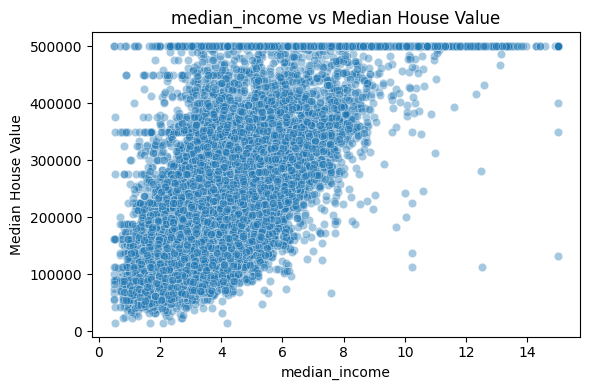

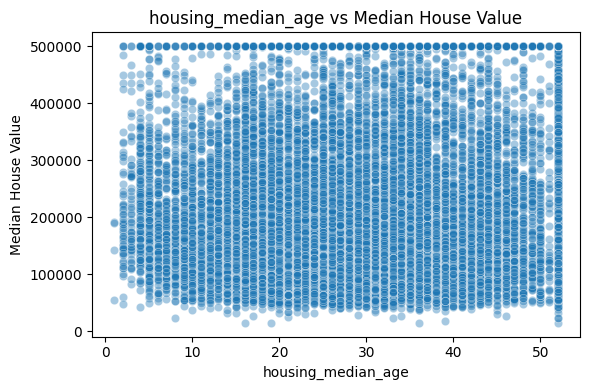

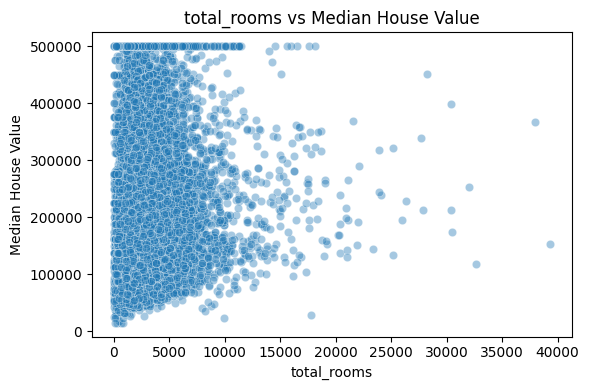

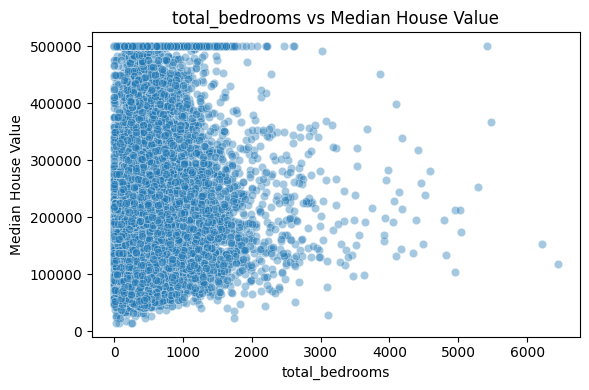

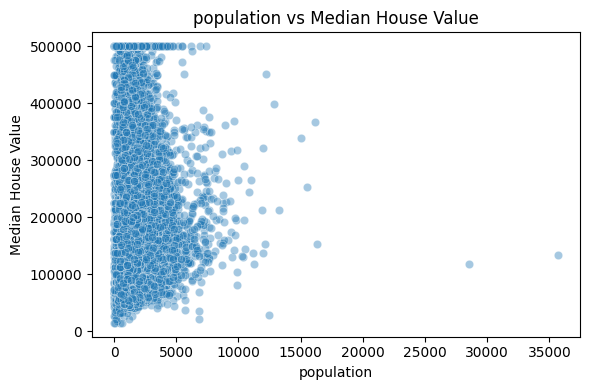

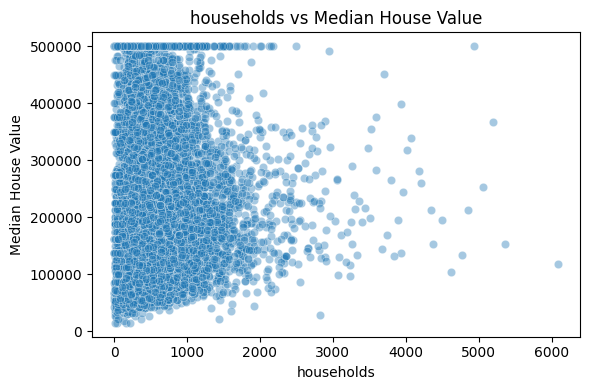

In [24]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df["median_house_value"], alpha=0.4)
    plt.title(f"{feature} vs Median House Value")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.tight_layout()
    plt.show()


As you can see, the best feature to this model is median_income. Now, we're gonna see this in a scatterplot

## 🤖 5. Train/Test Split & Model Training

In [17]:
X = df[["median_income"]]
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 44459.729169078666
Coefficient: [41933.84939381]


## 📈 6. Prediction & Evaluation

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 7091157771.76555
R² Score: 0.45885918903846656


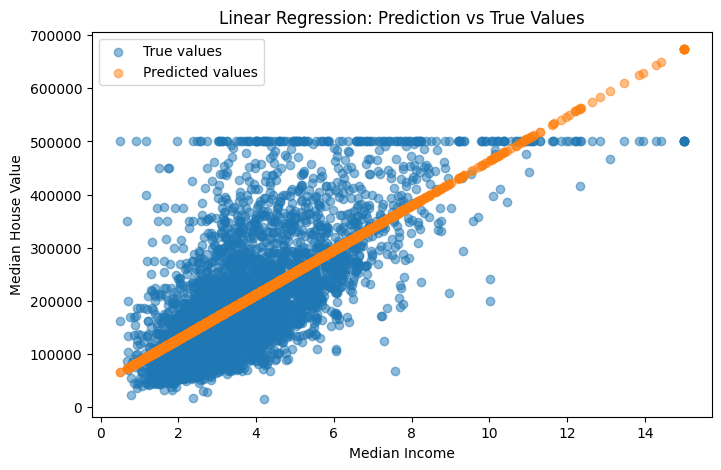

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.5, label="True values")
plt.scatter(X_test, y_pred, alpha=0.5, label="Predicted values")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Linear Regression: Prediction vs True Values")
plt.show()